In [1]:
import pandas as pd

path_data = "./dataset/data_penguin.csv"

data = pd.read_csv(path_data)
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


1. species: Jenis penguin (kategori).
2. island: Pulau tempat penguin ditemukan (kategori).
3. culmen_length_mm: Panjang culmen dalam milimeter (numerik).
4. culmen_depth_mm: Kedalaman culmen dalam milimeter (numerik).
5. flipper_length_mm: Panjang sirip dalam milimeter (numerik).
6. body_mass_g: Massa tubuh dalam gram (numerik).
7. sex: Jenis kelamin penguin (kategori).

In [3]:
data.corr(numeric_only=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [4]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
cekdatanullnya = data[data.isnull().any(axis=1)]
cekdatanullnya

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [6]:
numeric_summary = data.describe()

kategorikal_summary = data.select_dtypes(include='object').describe()

numeric_summary, kategorikal_summary

(       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
 count        342.000000       342.000000         342.000000   342.000000
 mean          43.921930        17.151170         200.915205  4201.754386
 std            5.459584         1.974793          14.061714   801.954536
 min           32.100000        13.100000         172.000000  2700.000000
 25%           39.225000        15.600000         190.000000  3550.000000
 50%           44.450000        17.300000         197.000000  4050.000000
 75%           48.500000        18.700000         213.000000  4750.000000
 max           59.600000        21.500000         231.000000  6300.000000,
        species  island   sex
 count      344     344   334
 unique       3       3     3
 top     Adelie  Biscoe  MALE
 freq       152     168   168)

In [7]:
data.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

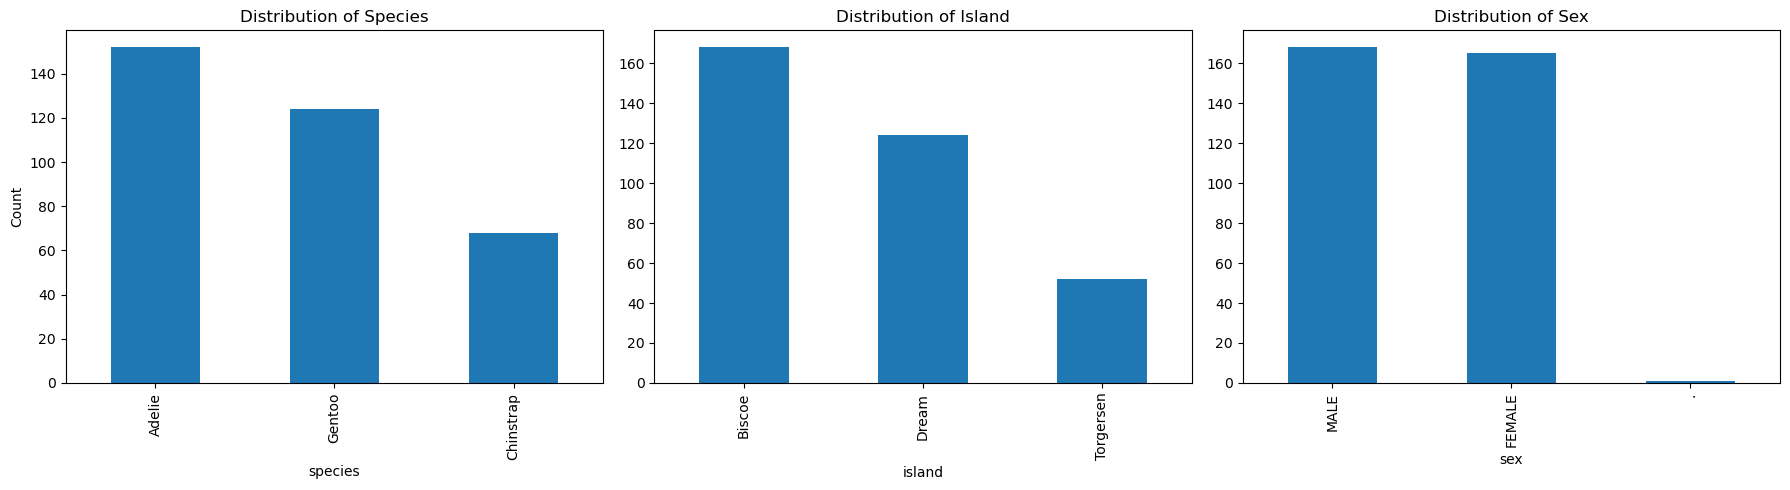

In [8]:
import matplotlib.pyplot as plt

# Distribusi kolom kategorikal
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Species distribution
data['species'].value_counts().plot(kind='bar', ax=axes[0], title='Distribution of Species')
axes[0].set_ylabel('Count')

# Island distribution
data['island'].value_counts().plot(kind='bar', ax=axes[1], title='Distribution of Island')

# Sex distribution
data['sex'].value_counts().plot(kind='bar', ax=axes[2], title='Distribution of Sex')

plt.tight_layout()
plt.show()


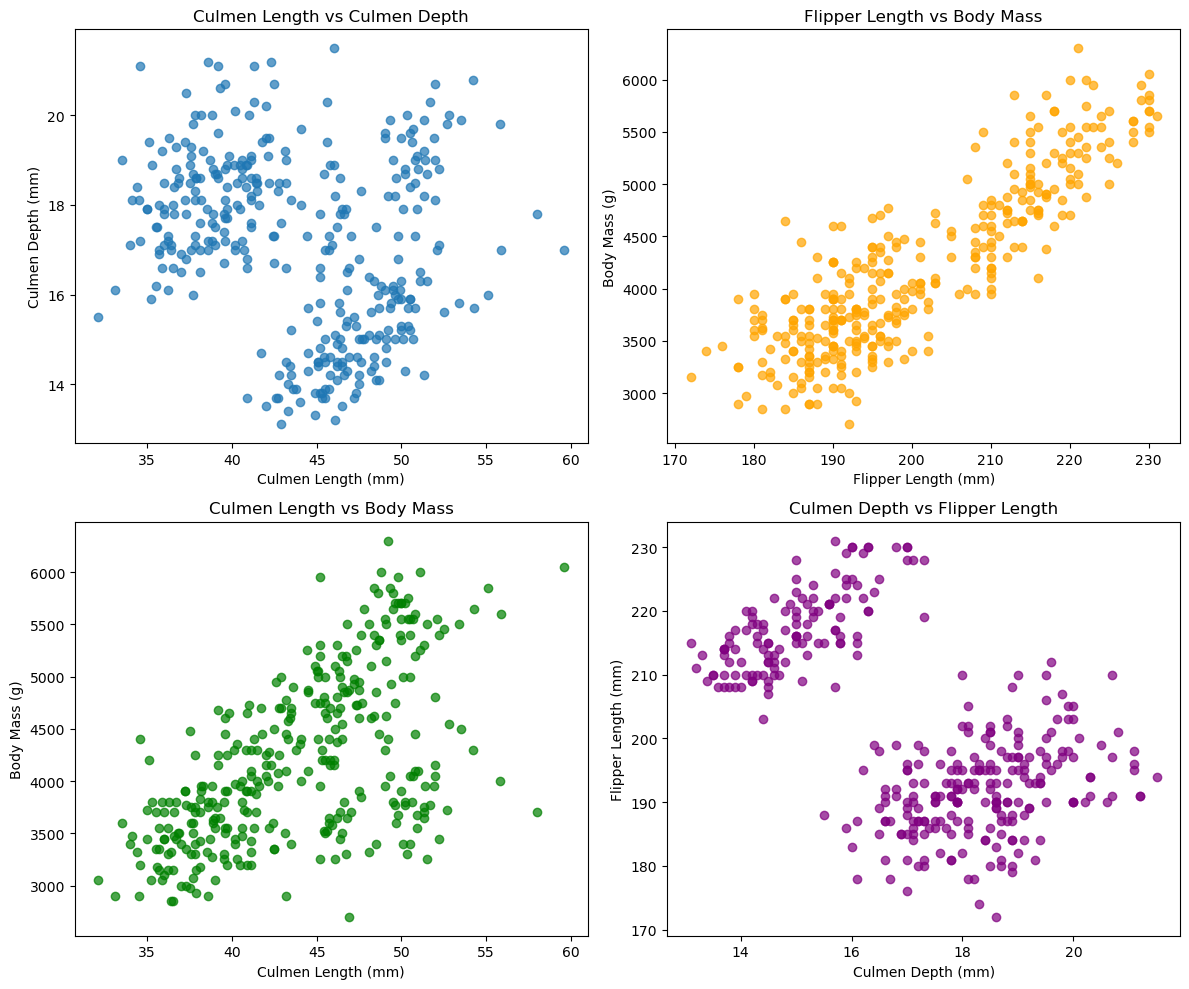

In [9]:
# Scatter plot untuk hubungan antar variabel numerik
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter: culmen length vs culmen depth
axes[0, 0].scatter(data['culmen_length_mm'], data['culmen_depth_mm'], alpha=0.7)
axes[0, 0].set_title('Culmen Length vs Culmen Depth')
axes[0, 0].set_xlabel('Culmen Length (mm)')
axes[0, 0].set_ylabel('Culmen Depth (mm)')

# Scatter: flipper length vs body mass
axes[0, 1].scatter(data['flipper_length_mm'], data['body_mass_g'], alpha=0.7, color='orange')
axes[0, 1].set_title('Flipper Length vs Body Mass')
axes[0, 1].set_xlabel('Flipper Length (mm)')
axes[0, 1].set_ylabel('Body Mass (g)')

# Scatter: culmen length vs body mass
axes[1, 0].scatter(data['culmen_length_mm'], data['body_mass_g'], alpha=0.7, color='green')
axes[1, 0].set_title('Culmen Length vs Body Mass')
axes[1, 0].set_xlabel('Culmen Length (mm)')
axes[1, 0].set_ylabel('Body Mass (g)')

# Scatter: culmen depth vs flipper length
axes[1, 1].scatter(data['culmen_depth_mm'], data['flipper_length_mm'], alpha=0.7, color='purple')
axes[1, 1].set_title('Culmen Depth vs Flipper Length')
axes[1, 1].set_xlabel('Culmen Depth (mm)')
axes[1, 1].set_ylabel('Flipper Length (mm)')

plt.tight_layout()
plt.show()


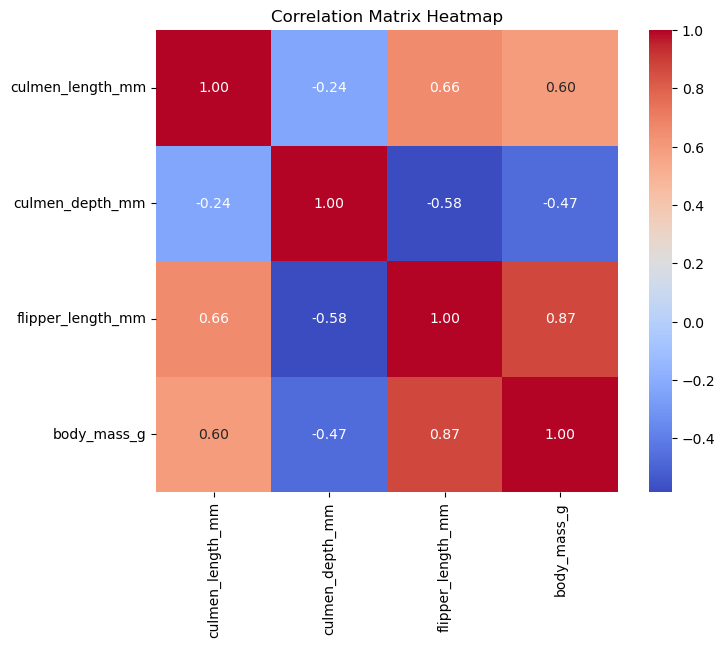

In [10]:
import seaborn as sns

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
missing_values = data.isnull().sum()

persentase_missing = (missing_values / len(data))  * 100

missing_info = pd.DataFrame({
    'Missing Values' : missing_values,
    'Persentase': persentase_missing
})

In [12]:
missing_info

,Missing Values,Persentase
species,0,0.000000
island,0,0.000000
culmen_length_mm,2,0.581395
culmen_depth_mm,2,0.581395
flipper_length_mm,2,0.581395
body_mass_g,2,0.581395
sex,10,2.906977


In [13]:
# Mengisi missing values pada kolom numerik dengan median
data['culmen_length_mm'].fillna(data['culmen_length_mm'].median(), inplace=True)
data['culmen_depth_mm'].fillna(data['culmen_depth_mm'].median(), inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].median(), inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].median(), inplace=True)

# Mengisi missing values pada kolom sex dengan modus
data['sex'].fillna(data['sex'].mode()[0], inplace=True)

# Verifikasi apakah masih ada nilai yang hilang
missing_values_after = data.isnull().sum()

missing_values_after

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4612\3520758334.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['culmen_length_mm'].fillna(data['culmen_length_mm'].median(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4612\3520758334.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Pemodelan

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['species', 'island', 'sex']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Menyimpan mapping lama dan baru
for column, le in label_encoders.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Mapping untuk kolom '{column}':")
    print(mapping)
    print()


Mapping untuk kolom 'species':
{'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

Mapping untuk kolom 'island':
{'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}

Mapping untuk kolom 'sex':
{'.': 0, 'FEMALE': 1, 'MALE': 2}



In [15]:
X = data.drop(columns=['species'])
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=42)


In [16]:
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
66,0,35.5,16.2,195.0,3350.0,1
229,0,46.8,15.4,215.0,5150.0,2
7,2,39.2,19.6,195.0,4675.0,2
140,1,40.2,17.1,193.0,3400.0,1
323,0,49.1,15.0,228.0,5500.0,2


In [17]:
y_train

66     0
229    2
7      0
140    0
323    2
      ..
188    1
71     0
106    0
270    2
102    0
Name: species, Length: 275, dtype: int32

In [18]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

target_kelas = ['Adelie', 'Chinstrap', 'Gentoo']
report_rf = classification_report(
    y_test, y_pred_rf, 
    target_names=target_kelas)

print(accuracy_rf)
print(report_rf)

1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        32
   Chinstrap       1.00      1.00      1.00        16
      Gentoo       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [19]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(
    y_test, y_pred_gb, 
    target_names=label_encoders['species'].classes_)

print(accuracy_gb)
print(report_gb)

0.9855072463768116
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        32
   Chinstrap       1.00      1.00      1.00        16
      Gentoo       0.95      1.00      0.98        21

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69



<Figure size 800x600 with 0 Axes>

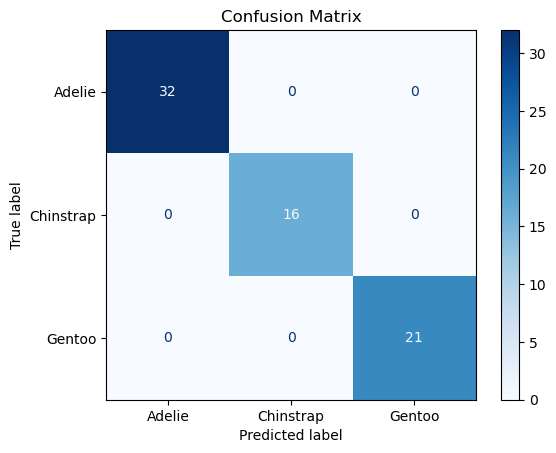

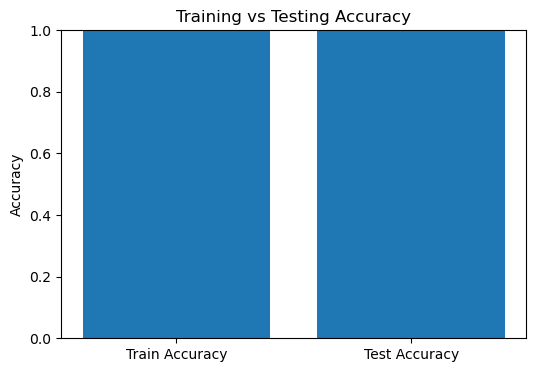

(1.0, 1.0)

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['species'].classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Hitung akurasi pada data latih dan data uji
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

# Visualisasi akurasi
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.show()

train_accuracy, test_accuracy


Simpan Model

In [22]:
import joblib

# Simpan model
joblib.dump(rf_model, './model/rf_model.joblib')
# Simpan label encoder
joblib.dump(label_encoders, './model/label_encoder.pkl')
print("Label Encoder dan Model berhasil disimpan!")

Label Encoder dan Model berhasil disimpan!


Uji dengan data baru!

In [21]:
import pandas as pd
from joblib import load

# Data baru
data_baru = pd.DataFrame({
    'island': ['Torgersen'],
    'culmen_length_mm': [39.1],
    'culmen_depth_mm': [18.7],
    'flipper_length_mm': [181],
    'body_mass_g': [3750],
    'sex': ['MALE']
})

# Muat label encoder untuk kolom kategorikal
label_encoders = load('./model/label_encoder.pkl')  # Pastikan Anda telah menyimpan label encoder dalam file ini

# Encode kolom kategorikal pada data baru
for column in ['island', 'sex']:
    if column in label_encoders:
        data_baru[column] = label_encoders[column].transform(data_baru[column])

# Muat model yang telah disimpan
model_rf = load('./model/rf_model.joblib')

# Lakukan prediksi dengan data baru
y_pred_baru = model_rf.predict(data_baru)

# Kembalikan hasil prediksi ke bentuk kategorikal (species)
species_encoder = label_encoders['species']  # Pastikan ada encoder untuk 'species'
y_pred_categorical = species_encoder.inverse_transform(y_pred_baru)

# Kembalikan kolom island dan sex ke bentuk aslinya
for column in ['island', 'sex']:
    if column in label_encoders:
        data_baru[column] = label_encoders[column].inverse_transform(data_baru[column])

# Buat DataFrame untuk hasil prediksi
hasil_prediksi = data_baru.copy()
hasil_prediksi['Hasil Prediksi (species)'] = y_pred_categorical

# Tampilkan tabel hasil prediksi
hasil_prediksi


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Hasil Prediksi (species)
0,Torgersen,39.1,18.7,181,3750,MALE,Adelie
